In [6]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np 

In [8]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.sample()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
43304,Male,36.0,0,0,never,37.84,4.8,85,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns :
    if col in numerical :
        df[col].fillna(df[col].median(), inplace=True)
    else : 
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19504\2444988392.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_19504\2444988392.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
numerical

['age', 'bmi', 'HbA1c_level']

In [7]:
catgcols

['gender',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'blood_glucose_level',
 'diabetes']

In [8]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [12]:
fitur = [col for col in df.columns if col != 'diabetes']
target = 'diabetes'

In [10]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [11]:
df[fitur].value_counts()

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level
Female  80.00  0             0              No Info          27.32  6.5          159                    10
                                                                    6.2          90                      9
                                                                    4.0          85                      8
                                                                    4.5          140                     7
                                                                    4.0          160                     7
                                                                                                        ..
Male    80.00  1             1              not current      29.30  5.8          100                     1
                                                             34.24  6.2          140                     1
                                           

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [14]:
df['diabetes'] = le.fit_transform(df['diabetes'])

In [13]:
x = df[fitur]
y = df[target]

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
df.to_csv('diabetes_clean.csv')

In [17]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='diabetes', ylabel='Count'>

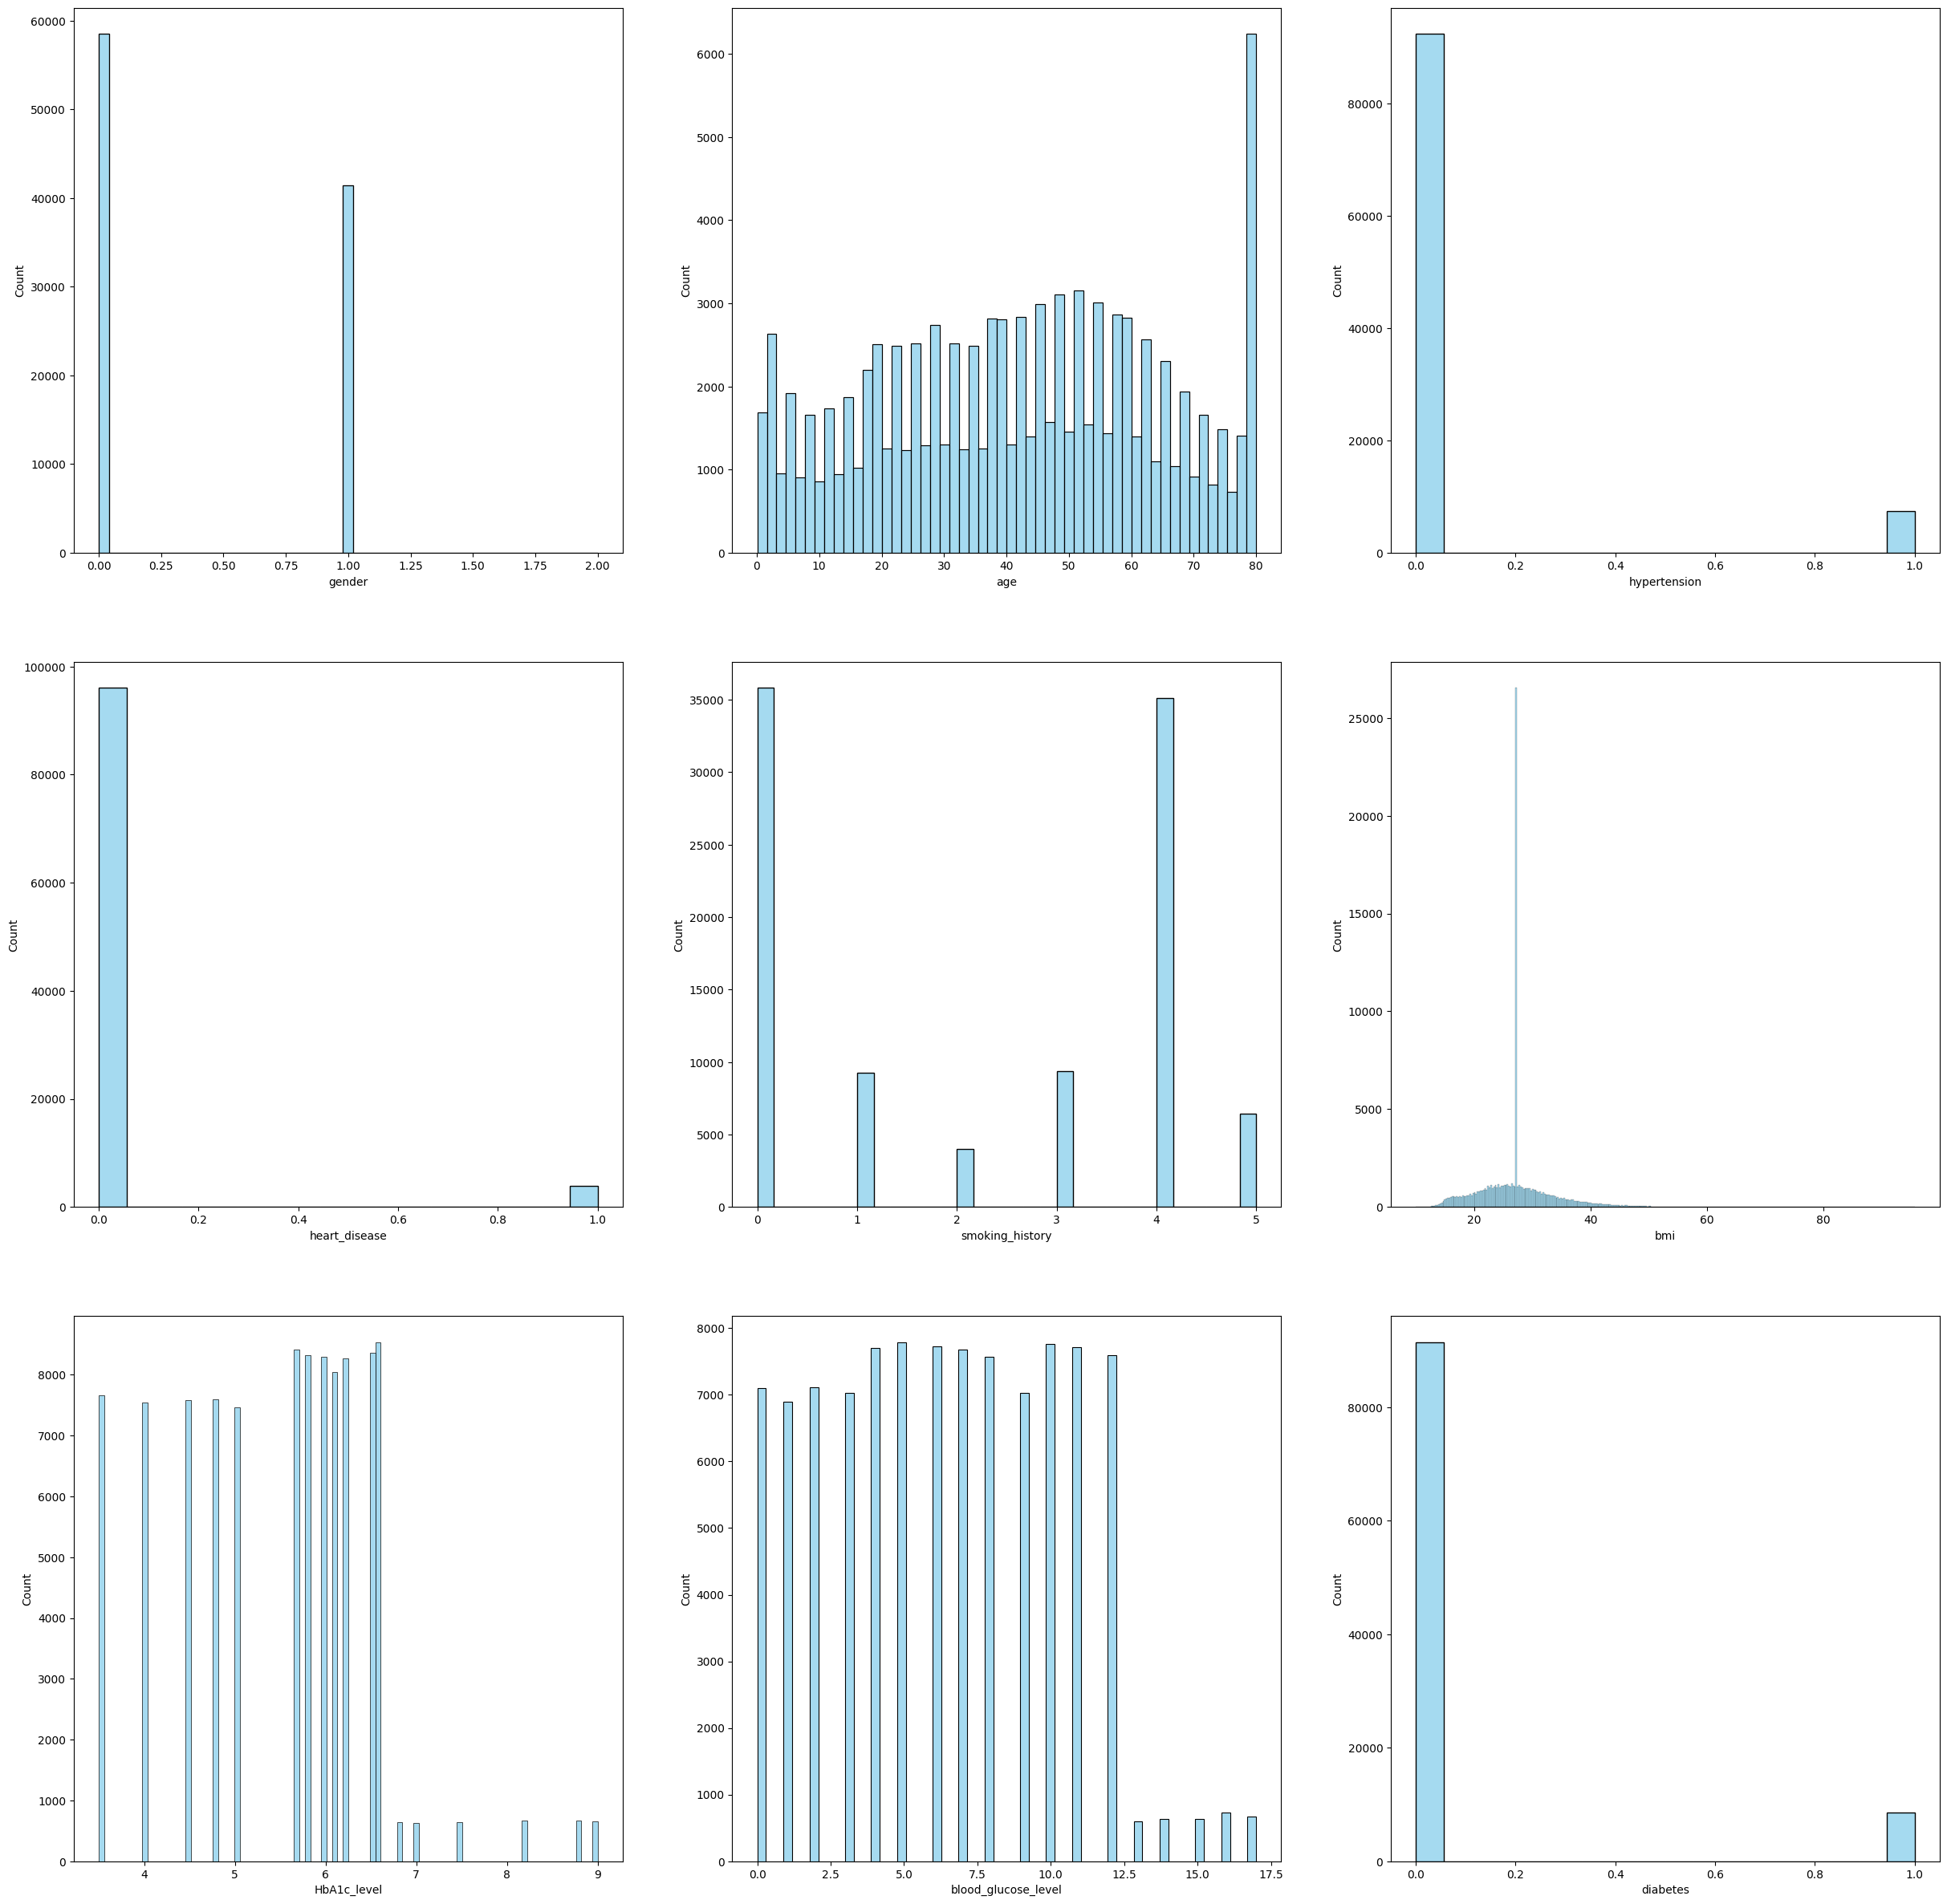

In [22]:
# Membuat grid dengan 9 baris dan 1 kolom
fig, axes = plt.subplots(3, 3, figsize=(30, 30 ))  # Ukuran lebih besar untuk tampilan vertikal

# Membuat histogram untuk setiap kolom
sns.histplot(data=df, x='gender', ax=axes[0, 0], color='skyblue')
sns.histplot(data=df, x='age', ax=axes[0, 1], color='skyblue')
sns.histplot(data=df, x='hypertension', ax=axes[0, 2], color='skyblue')
sns.histplot(data=df, x='heart_disease', ax=axes[1, 0], color='skyblue')
sns.histplot(data=df, x='smoking_history', ax=axes[1, 1], color='skyblue')
sns.histplot(data=df, x='bmi', ax=axes[1, 2], color='skyblue')
sns.histplot(data=df, x='HbA1c_level', ax=axes[2, 0], color='skyblue')
sns.histplot(data=df, x='blood_glucose_level', ax=axes[2, 1], color='skyblue')
sns.histplot(data=df, x='diabetes', ax=axes[2, 2], color='skyblue')

In [23]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

print(x.shape)
print(y.shape)

(100000, 8)
(100000,)


In [24]:
sm = SMOTE(random_state=42)
x_sampl, y_sampl = sm.fit_resample(x,y)

In [25]:
print(x_sampl.shape)
print(y_sampl.shape)

(183000, 8)
(183000,)


<function matplotlib.pyplot.show(close=None, block=None)>

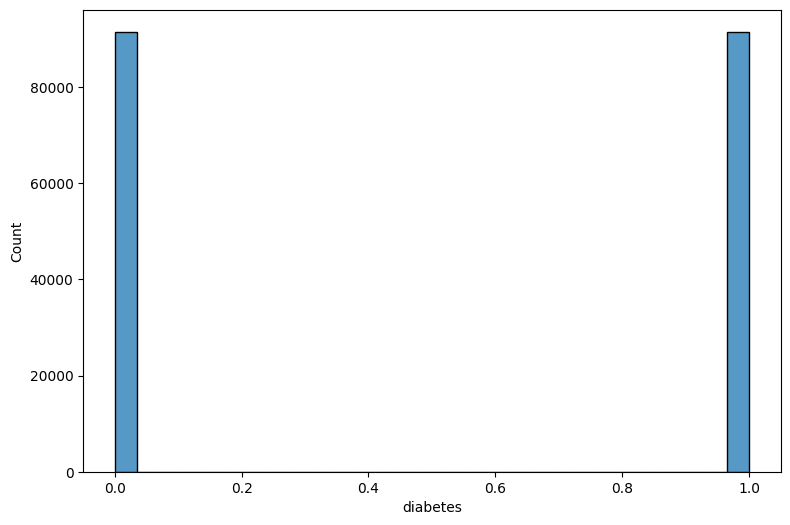

In [26]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampl)
plt.show

In [27]:
df.to_csv('diabetes_smote.csv')

In [28]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,6,0
1,0,54.0,0,0,0,27.32,6.6,0,0
2,1,28.0,0,0,4,27.32,5.7,9,0
3,0,36.0,0,0,1,23.45,5.0,8,0
4,1,76.0,1,1,1,20.14,4.8,8,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_sampl, y_sampl, test_size=0.2, random_state=42)


In [31]:
rfc = RandomForestClassifier(
    n_estimators=100,            # Jumlah pohon yang digunakan, biasanya lebih besar dari Decision Tree
    criterion='entropy',         # Kriteria pemisahan, setara dengan Decision Tree
    max_depth=12,                 # Kedalaman maksimum pohon
    max_features='sqrt',           # Menggunakan semua fitur untuk setiap pohon
    max_leaf_nodes=None,         # Tidak ada pembatasan pada jumlah daun
    min_samples_split=2,         # Sama dengan DTC, minimum sampel untuk membagi pohon
    min_samples_leaf=1,          # Sama dengan DTC, minimum sampel di setiap daun
    random_state=42,             # Random state untuk memastikan hasil yang konsisten
)

In [32]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

In [46]:
cm = [[0, 0], [0, 0]]  # Inisialisasi matriks 2x2
for true, pred in zip(y_test, y_pred):
    if true == 0 and pred == 0:
        cm[0][0] += 1  # True Negative
    elif true == 0 and pred == 1:
        cm[0][1] += 1  # False Positive
    elif true == 1 and pred == 0:
        cm[1][0] += 1  # False Negative
    elif true == 1 and pred == 1:
        cm[1][1] += 1  # True Positive

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# 5. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# 6. Cetak hasil
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")


Confusion Matrix:
[[16771 1522]
 [1073 17234]]
Accuracy    : 92.91%
Recall      : 94.14%
Specificity : 91.68%
Precision   : 91.89%
F1-Score    : 93.00%


In [49]:
import pickle

In [50]:
pickle.dump(rfc, open("rfc_fix.pkl", "wb"))

# Import library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Asumsikan X_sample dan y_sample sudah terdefinisi sebelumnya
# Contoh data: 
# X_sample = ... # fitur data
# y_sample = ... # label target

# 1. Split data menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_sampl, y_sampl, test_size=0.2, random_state=42)

# 2. Buat model Decision Tree
model = DecisionTreeClassifier(criterion="gini",max_depth=12,min_samples_split=2, max_features="sqrt",splitter="best",random_state=42)

# 3. Latih model
model.fit(x_train, y_train)

# 4. Prediksi hasil
y_pred = model.predict(x_test)

# 5. Hitung Confusion Matrix (menggunakan class 0 sebagai contoh untuk binary metrics)
tn, fp, fn, tp = confusion_matrix((y_test == 0).astype(int), (y_pred == 0).astype(int)).ravel()

# 6. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# 7. Cetak hasil dalam persentase
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")
